# Heavy-tailed kernels reveal a finer cluster structure in t-SNE visualizations

#### Dmitry Kobak, George Linderman, Stefan Steinerberger, Yuval Kluger, Philipp Berens

##### http://arxiv.org/blablabla

#### This notebook written by Dmitry Kobak (Jan--Feb 2019)

In [2]:
%matplotlib notebook

import numpy as np
import pylab as plt
import seaborn as sns
import pickle
import pandas as pd

sns.set_context('paper', font_scale=.85)
sns.set_style('ticks', rc={"axes.linewidth": .8})

# Version 1.1.0
import sys; sys.path.append('/home/localadmin/github/FIt-SNE')
from fast_tsne import fast_tsne

col = np.array(['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99',
                '#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a'])

## Toy simulations

### Toy example 1

<IPython.core.display.Javascript object>


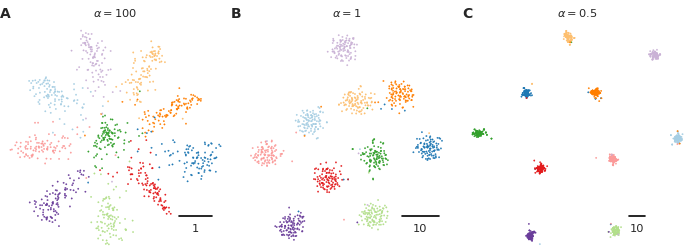

CPU times: user 592 ms, sys: 24 ms, total: 616 ms
Wall time: 2min 42s


In [3]:
%%time

n = 100 # sample size per class
p = 10  # dimensionality
k = 10  # number of classes
d = 4   # distance between each class mean and 0

dfs = [100, 1, .5]   # alpha values to use

np.random.seed(42)
X = np.random.randn(k*n, p)
for i in range(k):
    X[i*n:(i+1)*n, i] += d

Z_toy1 = []
for df in dfs:
    Z = fast_tsne(X, perplexity=50, seed=42, df=df, theta=0)
    Z_toy1.append(Z)

fig = plt.figure(figsize=(7,2.5))
ax = []
ax.append(plt.axes([0,   0, .33, .9]))
ax.append(plt.axes([.33, 0, .33, .9]))
ax.append(plt.axes([.66, 0, .33, .9]))

for i,Z in enumerate(Z_toy1):
    plt.sca(ax[i])
    plt.axis('equal', adjustable='box')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=col[np.floor(np.arange(n*k)/n).astype(int)])
    plt.title(r'$\alpha={}$'.format(dfs[i]))
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)

sns.despine(left=True, bottom=True)
plt.savefig('figures/fig-toy1.pdf')

hpos = [2, 15, 30]
hwidth = [1, 10, 10]

for i in range(3):
    plt.sca(ax[i])
    ax[i].autoscale(False)
    yl = plt.ylim()
    vpos      = yl[0] + (yl[1]-yl[0]) * .15
    vposlabel = yl[0] + (yl[1]-yl[0]) * .08
    plt.plot([hpos[i], hpos[i]+hwidth[i]], [vpos,vpos], 'k', linewidth=1.2)
    plt.text(hpos[i] + hwidth[i]/2, vposlabel, str(hwidth[i]), ha='center')
    
plt.text(0, 1.03, 'A', transform = plt.gcf().get_axes()[0].transAxes, fontsize=10, fontweight='bold')
plt.text(0, 1.03, 'B', transform = plt.gcf().get_axes()[1].transAxes, fontsize=10, fontweight='bold')
plt.text(0, 1.03, 'C', transform = plt.gcf().get_axes()[2].transAxes, fontsize=10, fontweight='bold')
    
sns.despine(left=True, bottom=True)
plt.savefig('figures/fig-toy1.pdf')

### Toy example 2

<IPython.core.display.Javascript object>


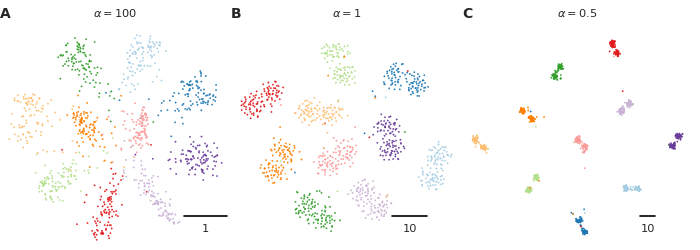

CPU times: user 484 ms, sys: 148 ms, total: 632 ms
Wall time: 2min 27s


In [171]:
%%time

n = 100 # sample size per class
p = 20  # dimensionality
k = 10  # number of classes
d = 4   # distance between each class mean and 0
dw = 4  # distance between each dumbbell sub-clusters

dfs = [100, 1, .5]   # alpha values to use

np.random.seed(42)
X = np.random.randn(k*n, p)
for i in range(k):
    X[i*n:(i+1)*n, i] += d
    X[i*n:i*n+int(n/2), i+k] += dw/2
    X[i*n+int(n/2):(i+1)*n, i+k] -= dw/2

Z_toy2 = []
for df in dfs:
    Z = fast_tsne(X, perplexity=50, seed=42, df=df, theta=0)
    Z_toy2.append(Z)

fig = plt.figure(figsize=(7,2.5))
ax = []
ax.append(plt.axes([0,   0, .33, .9]))
ax.append(plt.axes([.33, 0, .33, .9]))
ax.append(plt.axes([.66, 0, .33, .9]))

for i,Z in enumerate(Z_toy2):
    plt.sca(ax[i])
    plt.axis('equal', adjustable='box')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=col[np.floor(np.arange(n*k)/n).astype(int)])
    plt.title(r'$\alpha={}$'.format(dfs[i]))
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)

sns.despine(left=True, bottom=True)
plt.savefig('figures/fig-toy2.pdf')

hpos = [1.5, 13, 40]
hwidth = [1, 10, 10]

for i in range(3):
    plt.sca(ax[i])
    ax[i].autoscale(False)
    yl = plt.ylim()
    vpos      = yl[0] + (yl[1]-yl[0]) * .15
    vposlabel = yl[0] + (yl[1]-yl[0]) * .08
    plt.plot([hpos[i], hpos[i]+hwidth[i]], [vpos,vpos], 'k', linewidth=1.2)
    plt.text(hpos[i] + hwidth[i]/2, vposlabel, str(hwidth[i]), ha='center')
    
plt.text(0, 1.03, 'A', transform = plt.gcf().get_axes()[0].transAxes, fontsize=10, fontweight='bold')
plt.text(0, 1.03, 'B', transform = plt.gcf().get_axes()[1].transAxes, fontsize=10, fontweight='bold')
plt.text(0, 1.03, 'C', transform = plt.gcf().get_axes()[2].transAxes, fontsize=10, fontweight='bold')
    
plt.savefig('figures/fig-toy2.pdf')

<IPython.core.display.Javascript object>


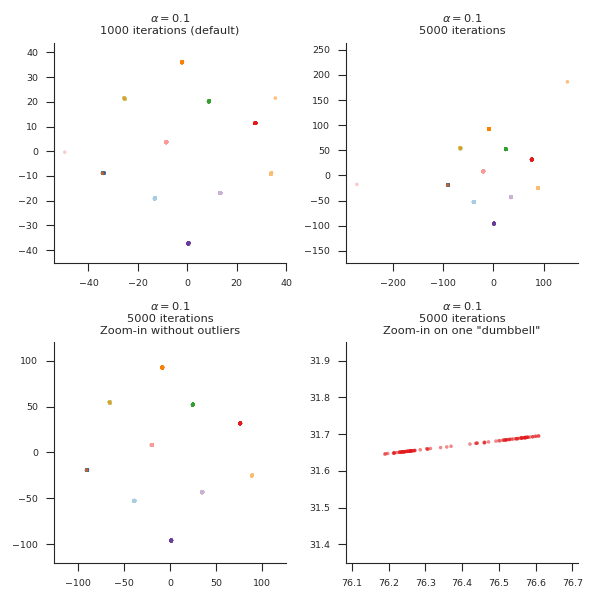

CPU times: user 456 ms, sys: 136 ms, total: 592 ms
Wall time: 6min 42s


In [119]:
%%time 

# Supplementary Figure -- what happens when alpha is very low

Z1 = fast_tsne(X, perplexity=50, seed=42, df=.1, theta=0)
Z2 = fast_tsne(X, perplexity=50, seed=42, df=.1, theta=0, max_iter=5000)
Z_toy2_cont = [Z1,Z2,Z2,Z2]

titles = [r'$\alpha=0.1$'+'\n1000 iterations (default)', r'$\alpha=0.1$'+'\n5000 iterations',
          r'$\alpha=0.1$'+'\n5000 iterations\nZoom-in without outliers',
          r'$\alpha=0.1$'+'\n5000 iterations\nZoom-in on one "dumbbell"']

zoomins = [None, None, [-120,120,-120,120], [76.1,76.7,31.35,31.95]]

fig = plt.figure(figsize=(6,6))
for i,Z in enumerate(Z_toy22):
    plt.subplot(2,2,i+1)
    plt.axis('equal', adjustable='box')
    plt.scatter(Z[:,0], Z[:,1], s=5, c=col[np.floor(np.arange(n*k)/n).astype(int)], alpha=.5)
    plt.title(titles[i])
    if zoomins[i] is not None:
        plt.axis(zoomins[i])

sns.despine()
plt.tight_layout()
plt.savefig('figures/suppl-lowalpha.pdf')

### Toy example 3 (separation as a function of alpha)

In [109]:
%%time

def pdist2(A,B):
    D = np.sum(A**2,axis=1,keepdims=True) + np.sum(B**2, axis=1, keepdims=True).T - 2*A@B.T
    return D

def stnr(Z,k):
    Zmeans =  np.zeros((k, Z.shape[1]))
    Zwithin = np.zeros_like(Z)
    n = int(Z.shape[0]/k)

    for i in range(k):
        Zmeans[i,:] = Z[i*n:(i+1)*n, :].mean(axis=0)
        Zwithin[i*n:(i+1)*n, :] = Z[i*n:(i+1)*n, :] - Zmeans[i,:]
    
    D2between = np.sum(pdist2(Zmeans, Zmeans)) / (Zmeans.shape[0]**2 - Zmeans.shape[0])
    D2within  = np.sum(pdist2(Zwithin, Zwithin)) / (Zwithin.shape[0]**2 - Zwithin.shape[0])
    return np.sqrt(D2between/D2within)


n = 100 # sample size per class
p = 10  # dimensionality
k = 2   # number of classes
d = 5   # distance between each class mean and 0

np.random.seed(42)
X = np.random.randn(k*n, p)
for i in range(k):
    X[i*n:(i+1)*n, i] += d
    
dfs = np.arange(.2, 3.1, .1)
stnrs = np.zeros_like(dfs)
for i,df in enumerate(dfs):
    print('.', end='')
    Z = fast_tsne(X, perplexity=50, seed=42, df=df, theta=0)
    stnrs[i] = stnr(Z,k)
print('')

.............................
CPU times: user 152 ms, sys: 828 ms, total: 980 ms
Wall time: 1min 25s


<IPython.core.display.Javascript object>


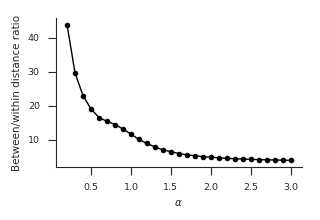

In [174]:
plt.figure(figsize=(3.2, 2.2))
plt.plot(dfs,  stnrs,  'ko-', linewidth=1, markersize=4, zorder=1)
plt.xlabel(r'$\alpha$')
plt.ylabel('Between/within distance ratio')
sns.despine()
plt.tight_layout()

# plt.yscale('log')
# plt.xscale('log')

plt.savefig('figures/fig-separation.pdf')

## MNIST

In [4]:
# Load MNIST data

from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')
x_train /= 255
x_test /= 255
X = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))
print(X.shape)

U, s, V = np.linalg.svd(X - X.mean(axis=0), full_matrices=False)
X50 = np.dot(U, np.diag(s))[:,:50]
PCAinit = X50[:,:2] / np.std(X50[:,0]) * 0.0001

Using TensorFlow backend.


(70000, 784)


In [111]:
Z_mnist = []
%time Z = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit, df=100)
Z_mnist.append(Z)
%time Z = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit, df=1)
Z_mnist.append(Z)
%time Z = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit, df=.5)
Z_mnist.append(Z)

CPU times: user 88 ms, sys: 64 ms, total: 152 ms
Wall time: 1min 28s
CPU times: user 72 ms, sys: 76 ms, total: 148 ms
Wall time: 1min 31s
CPU times: user 92 ms, sys: 56 ms, total: 148 ms
Wall time: 1min 38s


<IPython.core.display.Javascript object>


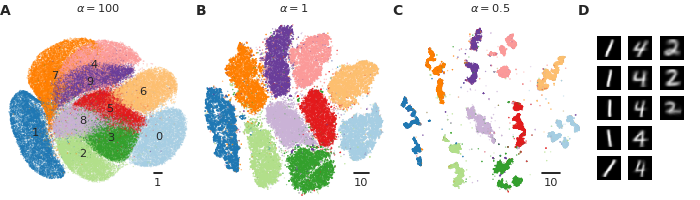

In [81]:
dfs = [100, 1, .5]
fig = plt.figure(figsize=(7,2))
w = .28
ax = []
ax.append(plt.axes([0,0,w,.9]))
ax.append(plt.axes([w,0,w,.9]))
ax.append(plt.axes([2*w,0,w,.9]))

for i,Z in enumerate(Z_mnist):
    plt.sca(ax[i])
    plt.axis('equal', adjustable='box')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=col[y], rasterized=True, alpha=.5, edgecolors='none')
    plt.title(r'$\alpha={}$'.format(dfs[i]))
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    
    if i==0:
        for digit in range(10):
            plt.text(np.mean(Z[y==digit,0]), np.mean(Z[y==digit,1]), digit, ha='center', va='center')

sns.despine(left=True, bottom=True)
plt.savefig('figures/fig-mnist.pdf')

hpos = [7, 40, 30]
hwidth = [1, 10, 10]

for i in range(3):
    plt.sca(ax[i])
    ax[i].autoscale(False)
    yl = plt.ylim()
    vpos      = yl[0] + (yl[1]-yl[0]) * .15
    vposlabel = yl[0] + (yl[1]-yl[0]) * .08
    plt.plot([hpos[i], hpos[i]+hwidth[i]], [vpos,vpos], 'k', linewidth=1.2)
    plt.text(hpos[i] + hwidth[i]/2, vposlabel, str(hwidth[i]), ha='center')
    
plt.text(0, 1.03, 'A', transform = plt.gcf().get_axes()[0].transAxes, fontsize=10, fontweight='bold')
plt.text(0, 1.03, 'B', transform = plt.gcf().get_axes()[1].transAxes, fontsize=10, fontweight='bold')
plt.text(0, 1.03, 'C', transform = plt.gcf().get_axes()[2].transAxes, fontsize=10, fontweight='bold')
plt.text(.95, 1.03, 'D', transform = plt.gcf().get_axes()[2].transAxes, fontsize=10, fontweight='bold')
    
plt.savefig('figures/fig-mnist.pdf', dpi=600)

from sklearn.cluster import DBSCAN
Z = Z_mnist[-1]
digits = [1, 4, 2]
for digitnum, digit in enumerate(digits):
    clustering = DBSCAN().fit(Z[y==digit,:])
    labels, counts = np.unique(clustering.labels_, return_counts=True)
    counts = counts[labels>=0]
    labels = labels[labels>=0]
    order = np.argsort(counts)[::-1]
    counts = counts[order]
    labels = labels[order]

    for i in np.where(counts>100)[0][:5]:
        plt.axes([.85 + .045*digitnum, .7 - .15*i, .12*2.3/7, .12])
        ind = clustering.labels_ == labels[i]
        plt.imshow(np.mean(X[y==digit,:][ind,:],axis=0).reshape(28,28), 
                   interpolation="nearest", vmin=0, vmax=1)
        plt.gray()
        plt.axis('off')

plt.savefig('figures/fig-mnist.pdf', dpi=600)

### UMAP comparison for MNIST  (Supplementary Figures)

In [9]:
import umap
print('UMAP version: ' + umap.__version__)

# UMAP code for computing $a$ and $b$ given min_dist
# Copied verbatim from the UMAP source code
from scipy.optimize import curve_fit
def find_ab_params(spread, min_dist):
    """Fit a, b params for the differentiable curve used in lower
    dimensional fuzzy simplicial complex construction. We want the
    smooth curve (from a pre-defined family with simple gradient) that
    best matches an offset exponential decay.
    """

    def curve(x, a, b):
        return 1.0 / (1.0 + a * x ** (2 * b))

    xv = np.linspace(0, spread * 3, 300)
    yv = np.zeros(xv.shape)
    yv[xv < min_dist] = 1.0
    yv[xv >= min_dist] = np.exp(-(xv[xv >= min_dist] - min_dist) / spread)
    params, covar = curve_fit(curve, xv, yv)
    return params[0], params[1]

UMAP version: 0.2.3


....

<IPython.core.display.Javascript object>


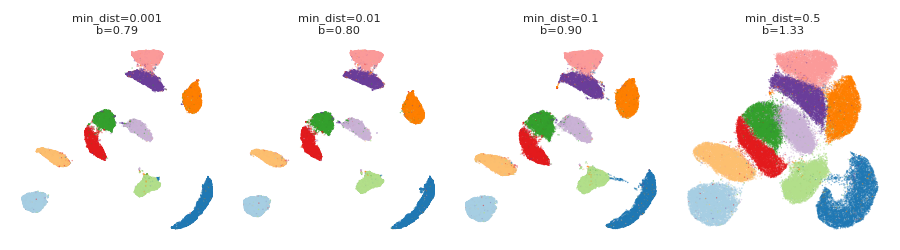

CPU times: user 6min 42s, sys: 11.8 s, total: 6min 53s
Wall time: 5min 35s


In [5]:
%%time

# min_dist: This controls how tightly the embedding is allowed compress points together. 
# Larger values ensure embedded points are more evenly distributed, while smaller values allow 
# the algorithm to optimise more accurately with regard to local structure. Sensible values 
# are in the range 0.001 to 0.5, with 0.1 being a reasonable default.

dists = [.001, .01, .1, .5]

Zumap = []
bs = []
for d in dists:
    print('.', flush=True, end='')
    Z = umap.UMAP(min_dist=d).fit_transform(X50)
    Zumap.append(Z)
    bs.append(find_ab_params(1,d)[1])    
    
fig, ax = plt.subplots(1, len(dists), figsize=(9,2.5))
for i,Z in enumerate(Zumap):
    plt.sca(ax[i])
    plt.scatter(Z[:,0], Z[:,1], s=1, c=col[y], rasterized=True, alpha=.5, edgecolors='none')
    plt.title('min_dist={}\nb={:.2f}'.format(dists[i], bs[i]))
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.savefig('figures/suppl-fig-umap.pdf', dpi=600)

### Longer optimisation, lower alpha, and isolated digits (Supplementary Figures)

In [11]:
%%time

Z10k = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit, df=.5, max_iter=10000)
pickle.dump(Z10k, open('Zmnist10k.pickle', 'wb'))

# final loss: 3.615

CPU times: user 456 ms, sys: 164 ms, total: 620 ms
Wall time: 4h 30min 28s


In [112]:
Z10k = pickle.load(open('Zmnist10k.pickle', 'rb'))
%time Z = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit, df=.5)

CPU times: user 88 ms, sys: 72 ms, total: 160 ms
Wall time: 1min 44s


<IPython.core.display.Javascript object>


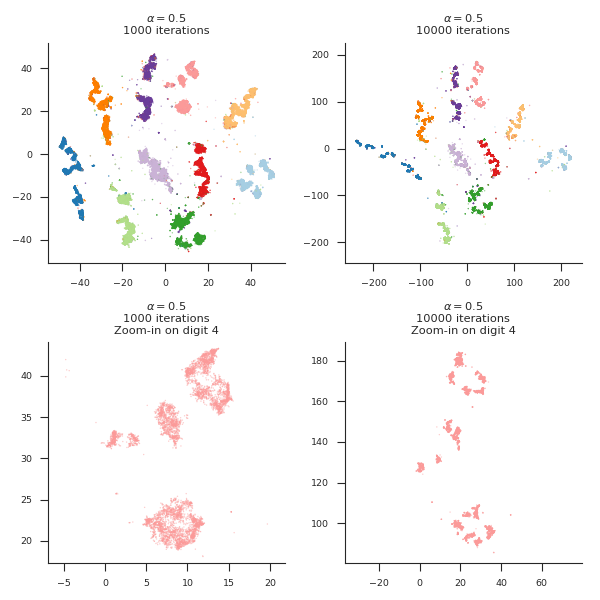

In [116]:
plt.figure(figsize=(6,6))

plt.subplot(221)
plt.axis('equal', adjustable='box')
plt.scatter(Z[:,0], Z[:,1], s=1, c=col[y], rasterized=True, alpha=.5, edgecolors='none')
plt.title(r'$\alpha=0.5$'+'\n1000 iterations')

plt.subplot(222)
plt.axis('equal', adjustable='box')
plt.scatter(Z10k[:,0], Z10k[:,1], s=1, c=col[y], rasterized=True, alpha=.5, edgecolors='none')
plt.title(r'$\alpha=0.5$'+'\n10000 iterations')

plt.subplot(223)
plt.axis('equal', adjustable='box')
ind = (y==4) & (Z[:,0]>-5) & (Z[:,0]<20) & (Z[:,1]>15) & (Z[:,0]<45)
plt.scatter(Z[ind,0], Z[ind,1], s=1, c=col[4], rasterized=True, alpha=.5, edgecolors='none')
plt.title(r'$\alpha=0.5$'+'\n1000 iterations\nZoom-in on digit 4')

plt.subplot(224)
plt.axis('equal', adjustable='box')
ind = (y==4) & (Z10k[:,0]>-10) & (Z10k[:,0]<50) & (Z10k[:,1]>80) & (Z10k[:,0]<200)
plt.scatter(Z10k[ind,0], Z10k[ind,1], s=1, c=col[4], rasterized=True, alpha=.5, edgecolors='none')
plt.title(r'$\alpha=0.5$'+'\n10000 iterations\nZoom-in on digit 4')

sns.despine()
plt.tight_layout()
plt.savefig('figures/suppl-fig-mnist10k.pdf', dpi=600)

Number of images of digit 4: 6824


<IPython.core.display.Javascript object>


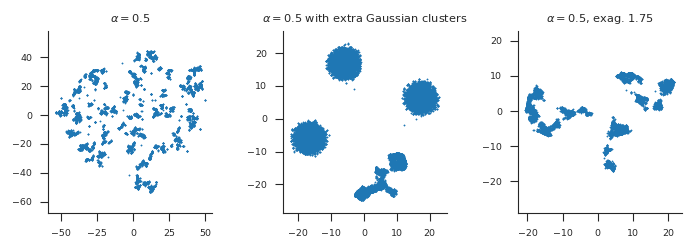

CPU times: user 624 ms, sys: 124 ms, total: 748 ms
Wall time: 1min 23s


In [133]:
%%time

# Isolated digit of MNIST

print('Number of images of digit 4: {}'.format(np.sum(y==4)))

Zisolated = []
Z = fast_tsne(X50[y==4], perplexity=50, df=.5, max_iter=1000, initialization=PCAinit[y==4,:])
Zisolated.append(Z)

Xext = [X50[y==4]]
for i in range(3):
    Z = np.random.randn(7000, 50)
    Z[:,i] += 10
    Xext.append(Z)
Xext = np.concatenate(Xext)
Z = fast_tsne(Xext, perplexity=50, df=.5, seed=42)
Zisolated.append(Z)

Z = fast_tsne(X50[y==4], perplexity=50, df=.5, max_iter=1000, late_exag_coeff=1.75, start_late_exag_iter=250,
             initialization=PCAinit[y==4,:])
Zisolated.append(Z)
# Z = fast_tsne(X50[y==4], perplexity=50, df=.1, max_iter=1000, initialization=PCAinit[y==4,:])
# Zisolated.append(Z)

plt.figure(figsize=(7,2.5))
# titles = [r'$\alpha=0.5$', r'$\alpha=0.5$, exag. 1.75', r'$\alpha=0.1$']
titles = [r'$\alpha=0.5$', r'$\alpha=0.5$ with extra Gaussian clusters', r'$\alpha=0.5$, exag. 1.75']
for i,Z in enumerate(Zisolated):
    plt.subplot(1,3,i+1)
    plt.axis('equal', adjustable='box')
    plt.scatter(Z[:,0], Z[:,1], s=1, rasterized=True)
    plt.title(titles[i])
sns.despine()
plt.tight_layout()
plt.savefig('figures/suppl-fig-mnist-isolated.pdf', dpi=600)

### MNIST scan of the alpha range (animations etc.)

In [37]:
%%time 

Z1 = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit, load_affinities='save', df=100)
dfs = np.concatenate((np.arange(100,5,-1), np.arange(5,1,-.25), np.arange(1,.499,-.01)))

Zmovie1 = []
kls1 = []
Zmovie2  = []
kls2  = []
for i,df in enumerate(dfs):
    print('.', end='')
        
    Z,kl = fast_tsne(X50, perplexity=50, learning_rate=1000, initialization=PCAinit, 
                     load_affinities='load', df=df, return_loss=True)
    Zmovie1.append(Z)
    kls1.append(kl[-1])
    
    if i>0:
        Z,kl = fast_tsne(X50, perplexity=50, learning_rate=1000, 
                         initialization=Zmovie2[-1]/np.std(Zmovie2[-1][:,0])*0.0001, 
                         load_affinities='load', df=df, return_loss=True, early_exag_coeff=1)
    else:
        Z,kl = fast_tsne(X50, perplexity=50, learning_rate=1000, 
                         initialization=Z1/np.std(Z1[:,0])*0.0001, 
                         load_affinities='load', df=df, return_loss=True, early_exag_coeff=1)
    Zmovie2.append(Z)
    kls2.append(kl[-1])
    
    pickle.dump([Zmovie1, Zmovie2, kls1, kls2, dfs], open('Zmovie.pickle', 'wb'))
print('')

..................................................................................................................................................................
CPU times: user 35.1 s, sys: 51.8 s, total: 1min 26s
Wall time: 6h 41min 18s


In [10]:
Zmovie1, Zmovie2, kls1, kls2, dfs = pickle.load(open('Zmovie.pickle', 'rb'))

<IPython.core.display.Javascript object>


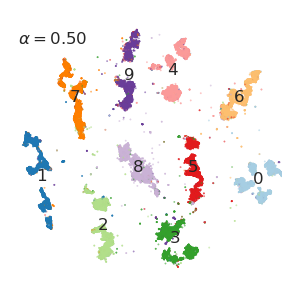

In [18]:
Zmovie = Zmovie1

sns.set()
sns.set_style('white')
fig = plt.figure(figsize=(3,3))
ll = plt.text(0, .9, r'$\alpha={}$'.format(100), transform = plt.gca().transAxes)
sc = plt.scatter(Zmovie[0][:,0], Zmovie[0][:,1], c=col[y], s=1, alpha=.5)
tt = []
for digit in range(10):
    t = plt.text(np.mean(Zmovie[0][y==digit,0]), np.mean(Zmovie[0][y==digit,1]), digit, ha='center', va='center')
    tt.append(t)
sns.despine(left=True, bottom=True)
m = np.max(np.abs(Zmovie[0]))
plt.xlim([-m, m])
plt.ylim([-m, m])
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.tight_layout()

pauses = [100, 1, 0.5]
pauselength = 10
frames = []
for i,df in enumerate(dfs):
    if np.round(df,3) in pauses:
        frames += [i]*pauselength
    else:
        frames += [i]

def update_plot(i):
    sc.set_offsets(Zmovie[frames[i]])
    m = np.max(np.abs(Zmovie[frames[i]]))
    plt.xlim([-m, m])
    plt.ylim([-m, m])
    for digit,t in enumerate(tt):
        t.set_position((np.mean(Zmovie[frames[i]][y==digit,0]), 
                        np.mean(Zmovie[frames[i]][y==digit,1])))
    if dfs[frames[i]]>=5:
        ll.set_text(r'$\alpha={}$'.format(int(dfs[frames[i]])))
    elif dfs[frames[i]]>=1:
        ll.set_text(r'$\alpha={:.1f}$'.format(dfs[frames[i]]))
    else:
        ll.set_text(r'$\alpha={:.2f}$'.format(dfs[frames[i]]))

from matplotlib import animation
myanim = animation.FuncAnimation(fig, update_plot, frames=len(frames), 
                                 interval=100, repeat=False)

In [19]:
myanim.save('animations/mnist.gif', dpi=150, writer='imagemagick')

# to compress gif (https://github.com/kornelski/giflossy)
# /usr/local/bin/gifsicle --lossy=200 --colors 64 -i mnist.gif -o mnist-sm.gif

# to convert to mp4
# ffmpeg -f gif -i mnist.gif mnist.mp4

# direct export to mp4 does not work very well for some reason
# myanim.save('animations/test.mp4', dpi=150, writer=animation.writers['ffmpeg'](fps=10))

# undo seaborn style set for animation
sns.set_context('paper', font_scale=.85)
sns.set_style('ticks', rc={"axes.linewidth": .8})

<IPython.core.display.Javascript object>


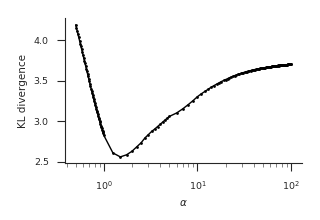

In [40]:
plt.figure(figsize=(3.2, 2.2))
plt.plot(dfs,  kls1,  'ko-', linewidth=1, markersize=2)
plt.xscale('log')
sns.despine()
plt.xlabel(r'$\alpha$')
plt.ylabel('KL divergence')
plt.tight_layout()
plt.savefig('figures/suppl-fig-kl.pdf')

## Tasic et al.

In [100]:
# The pre-processing follows Kobak & Berens (2018) preprint
# https://github.com/berenslab/rna-seq-tsne/ 

# this file is taken from the Github link above
import rnaseqTools

# define data format needed to load the pickle file
# and load the data. The pickle file can be generated by running
# the script in the linked Github page
from collections import namedtuple
RNAseqData = namedtuple('RNAseqData', 'counts rpkm genes areas clusters clustergroups '
                                      'clusterColors clusterNames clustergroupNames')
tasic2018 = pickle.load(open('allenData.pickle', 'rb'))

fr = np.array([np.mean(tasic2018.areas[tasic2018.clusters==c]) for c in range(tasic2018.clusterNames.size)])
markers = ['D' if f<.05 else 's' if f>.95 else 'o' for f in fr]

importantGenesTasic2018 = rnaseqTools.geneSelection(tasic2018.counts, n=3000, threshold=32, plot=False)
librarySizes = np.sum(tasic2018.counts, axis=1)
X = np.log2(tasic2018.counts[:, importantGenesTasic2018] / librarySizes * 1e+6 + 1)  
X = np.array(X)
X = X - X.mean(axis=0)
U,s,V = np.linalg.svd(X, full_matrices=False)
U[:,np.sum(V,axis=1)<0] *= -1
X = np.dot(U, np.diag(s))
X = X[:, np.argsort(s)[::-1]][:,:50]

PCAinit = X[:,:2]/np.std(X[:,0])*.0001

Z_tasic = []
Z = fast_tsne(X, perplexity = 50, initialization = PCAinit, df=1)
Z_tasic.append(Z)
Z = fast_tsne(X, perplexity = 50, initialization = PCAinit, df=.6)
Z_tasic.append(Z)
Z_tasic.append([])

Chosen offset: 6.43


<IPython.core.display.Javascript object>


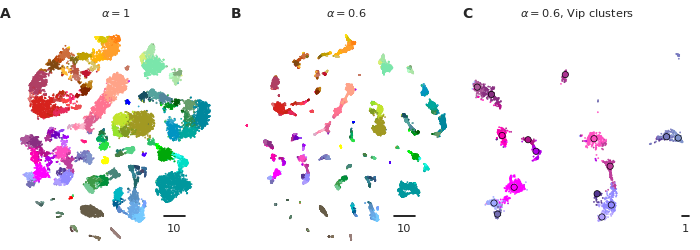

In [110]:
ind = np.array([c.split()[0]=='Vip' for c in tasic2018.clusterNames[tasic2018.clusters]])
Z_tasic[2] = Z_tasic[1].copy()
Z_tasic[2][~ind,:] = np.nan

dfs = [1, .6, .6]
fig = plt.figure(figsize=(7,2.5))
w = .33
ax = []
ax.append(plt.axes([0,0,w,.9]))
ax.append(plt.axes([w,0,w,.9]))
ax.append(plt.axes([2*w,0,w,.9]))

for i,Z in enumerate(Z_tasic):
    plt.sca(ax[i])
    plt.axis('equal', adjustable='box')
    plt.scatter(Z[:,0], Z[:,1], s=1, c=tasic2018.clusterColors[tasic2018.clusters],
                rasterized=True)#, alpha=.75, edgecolors='none')
    plt.title(r'$\alpha={}$'.format(dfs[i]))
    if i==2:
        plt.title(r'$\alpha=0.6$, Vip clusters')
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    
# Plot means in subplot 3
plt.sca(ax[2])
Z = Z_tasic[2]
K = tasic2018.clusterNames.size
Zmeans = np.zeros((K, 2)) * np.nan
for c in range(K):
    if not all(np.isnan(Z[tasic2018.clusters==c, 0])):
        Zmeans[c,:] = np.median(Z[tasic2018.clusters==c, :2], axis=0)
nonans = ~np.isnan(Zmeans[:,0])
plt.scatter(Zmeans[nonans,0], Zmeans[nonans,1],
            color=tasic2018.clusterColors[nonans], 
            s=20, edgecolor='k', linewidth=.5);
    
sns.despine(left=True, bottom=True)
plt.savefig('figures/fig-tasic.pdf', dpi=600)

hpos = [25, 20, -10]
hwidth = [10, 10, 1]

for i in range(3):
    plt.sca(ax[i])
    ax[i].autoscale(False)
    yl = plt.ylim()
    vpos      = yl[0] + (yl[1]-yl[0]) * .15
    vposlabel = yl[0] + (yl[1]-yl[0]) * .08
    plt.plot([hpos[i], hpos[i]+hwidth[i]], [vpos,vpos], 'k', linewidth=1.2)
    plt.text(hpos[i] + hwidth[i]/2, vposlabel, str(hwidth[i]), ha='center')
    
plt.text(0, 1.03, 'A', transform = plt.gcf().get_axes()[0].transAxes, fontsize=10, fontweight='bold')
plt.text(0, 1.03, 'B', transform = plt.gcf().get_axes()[1].transAxes, fontsize=10, fontweight='bold')
plt.text(0, 1.03, 'C', transform = plt.gcf().get_axes()[2].transAxes, fontsize=10, fontweight='bold')
    
plt.savefig('figures/fig-tasic.pdf', dpi=600)

## HathiTrust

In [134]:
%%time

# Data files are from https://zenodo.org/record/1477018
meta = pd.read_csv('/home/localadmin/hathi/data_shuffled.tsv', sep='\t', error_bad_lines=False)
idsRus = np.array(meta['id'])[np.array(meta['language'])=='Russian']

from gensim.models.keyedvectors import KeyedVectors
model = KeyedVectors.load_word2vec_format('/home/localadmin/hathi/hathi_pca.bin', binary=True)

X = np.zeros((idsRus.size, 100))
for i,ident in enumerate(idsRus):
    X[i,:] = model[ident]
    
print(X.shape)
model = []

b'Skipping line 12799837: expected 8 fields, saw 9\n'


(408291, 100)
CPU times: user 2min 36s, sys: 5.89 s, total: 2min 42s
Wall time: 2min 50s


In [138]:
# Getting publication dates
dates = np.array(meta['date'])[np.array(meta['language'])=='Russian']
datesnum = np.zeros(dates.size)
datesnum[dates=='None'] = np.nan
datesnum[dates!='None'] = dates[dates!='None'].astype(int)
datesnum[[d>2018 if ~np.isnan(d) else False for d in datesnum]] = np.nan
datesnum[[d<1700 if ~np.isnan(d) else False for d in datesnum]] = np.nan

# Most frequent LoC categories
lcs = np.array(meta['lc1'])[np.array(meta['language'])=='Russian'].astype('str')
types, counts = np.unique(lcs, return_counts=True)
print('LIBRARY OF CONGRESS CATEGORIES')
for t,c in zip(types [np.argsort(counts)[::-1]][:10], 
               counts[np.argsort(counts)[::-1]][:10]):
    print(t + '\t {}'.format(c))
print('...\n')

# Selecting some poetry
authors = np.array(meta['first_author_name'])[np.array(meta['language'])=='Russian'].astype('str')
poets = [i for i,s in enumerate(authors) if 'Fet, A. A.' in s 
         or 'tchev, F. I.' in s or 'Mayakovsky, Vladimir' in s
         or 'Akhmatova, Anna' in s or 'Pushkin, Aleksandr' in s
         or 'Blok, Aleksandr' in s or 'Mandelʹshtam, Osip' in s
         or 'Brodsky, Joseph' in s]

print('Poetry books selected: {}'.format(len(poets)))

LIBRARY OF CONGRESS CATEGORIES
nan	 220669
PG	 30352
DK	 23876
Z	 7935
HD	 6932
QA	 6490
HC	 6116
AP	 5676
QC	 5104
D	 4181
...

Poetry books selected: 1369


In [179]:
%%time

Z_hathi = []
Z = fast_tsne(X, perplexity=50, learning_rate=10000, seed=42, load_affinities='save')
Z_hathi.append(Z)
Z = fast_tsne(X, perplexity=50, learning_rate=10000, seed=42, df=.5, load_affinities='load')
Z_hathi.append(Z)

CPU times: user 2.25 s, sys: 1.38 s, total: 3.63 s
Wall time: 18min 44s


<IPython.core.display.Javascript object>


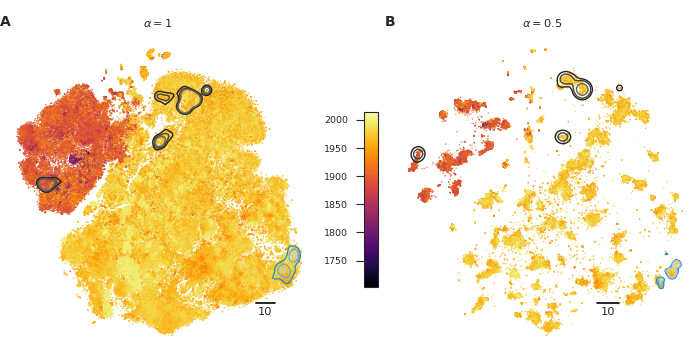

In [238]:
fig = plt.figure(figsize=(7, 3.5))
ax = []
ax.append(plt.axes([0, 0, .45, .9]))
ax.append(plt.axes([.55, 0, .45,.9]))
cax   = plt.axes([.52,.18,.02,.5])

dfs = [1, .5]
for i,Z in enumerate(Z_hathi):
    plt.sca(ax[i])
    plt.axis('equal', adjustable='box')
    plt.scatter(Z[:,0], Z[:,1], s=1, alpha=.5, c=datesnum, rasterized=True, edgecolors='none', cmap='inferno')
    plt.title(r'$\alpha={}$'.format(dfs[i]))
    plt.gca().get_xaxis().set_visible(False)
    plt.gca().get_yaxis().set_visible(False)
    
# contours
Z = Z_hathi[0]
plt.sca(ax[0])
sns.kdeplot(Z[lcs=='QA',0], Z[lcs=='QA',1], n_levels=[.002,.003,.004], cmap=None,
            linewidths=1, colors=['#2b8cbe', '#74a9cf', '#bdc9e1'], bw=2)
# sns.kdeplot(Z[lcs=='QC',0], Z[lcs=='QC',1], n_levels=[.0004,.001], cmap='Greens_d', linewidths=1)
sns.kdeplot(Z[poets,0], Z[poets,1], n_levels=[.0006,.0008,.001], cmap=None,
            linewidths=1, colors=['#222222', '#444444', '#666666'], bw=2)

Z = Z_hathi[1]
plt.sca(ax[1])
sns.kdeplot(Z[lcs=='QA',0], Z[lcs=='QA',1], n_levels=[.004, .007, .01], cmap=None,
            linewidths=1, colors=['#2b8cbe', '#74a9cf', '#bdc9e1'])
# sns.kdeplot(Z[lcs=='QC',0], Z[lcs=='QC',1], n_levels=[.005, .01], cmap='Greens_d', linewidths=1)
sns.kdeplot(Z[poets,0], Z[poets,1], n_levels=[.001, .002, .005], cmap=None,
            linewidths=1, colors=['#222222', '#444444', '#666666'], bw=2)

# colorbar
plt.sca(ax[0])
cbar = plt.colorbar(cax=cax)
cbar.set_alpha(1)
cbar.solids.set_edgecolor('face')
cbar.solids.set_rasterized(True)
cbar.draw_all()

sns.despine(left=True, bottom=True)
plt.savefig('figures/fig-hathi.pdf', dpi=600)

hpos = [50, 20]
hwidth = [10, 10]

for i in range(2):
    plt.sca(ax[i])
    ax[i].autoscale(False)
    yl = plt.ylim()
    vpos      = yl[0] + (yl[1]-yl[0]) * .15
    vposlabel = yl[0] + (yl[1]-yl[0]) * .11
    plt.plot([hpos[i], hpos[i]+hwidth[i]], [vpos,vpos], 'k', linewidth=1.2)
    plt.text(hpos[i] + hwidth[i]/2, vposlabel, str(hwidth[i]), ha='center')
    
plt.text(0, 1.03, 'A', transform = plt.gcf().get_axes()[0].transAxes, fontsize=10, fontweight='bold')
plt.text(0, 1.03, 'B', transform = plt.gcf().get_axes()[1].transAxes, fontsize=10, fontweight='bold')

plt.savefig('figures/fig-hathi.pdf', dpi=600)